# Analytics 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race',
        'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'label']

In [6]:
train_df = pd.read_csv("adult.data", header =None, names =names)

In [7]:
train_df

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    32561 non-null object
label            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
train_df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
train_df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
train_df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [15]:
relation_totals = train_df.groupby('relationship')['sex'].value_counts()

In [16]:
relation_totals

relationship     sex    
 Husband          Male      13192
                  Female        1
 Not-in-family    Male       4430
                  Female     3875
 Other-relative   Male        551
                  Female      430
 Own-child        Male       2823
                  Female     2245
 Unmarried        Female     2654
                  Male        792
 Wife             Female     1566
                  Male          2
Name: sex, dtype: int64

In [19]:
train_df.corr()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
educationnum,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capitalgain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capitalloss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hoursperweek,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [20]:
train_df.describe(percentiles =[0.01, 0.05, .95, .99])

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
1%,17.000000,2.718580e+04,3.000000,0.000000,0.000000,8.000000
5%,19.000000,3.946000e+04,5.000000,0.000000,0.000000,18.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
95%,63.000000,3.796820e+05,14.000000,5013.000000,0.000000,60.000000
99%,74.000000,5.100720e+05,16.000000,15024.000000,1980.000000,80.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Pivot Table

In [22]:
pd.pivot_table(train_df, values ='hoursperweek', index=['relationship', 'workclass'], columns =['label'], aggfunc =np.mean)

label                                  <=50K       >50K
relationship    workclass                              
 Husband         ?                 30.722222  37.325581
                 Federal-gov       42.337748  43.046763
                 Local-gov         41.400000  44.556086
                 Private           42.504254  46.176925
                 Self-emp-inc      48.289683  50.492509
                 Self-emp-not-inc  46.011044  48.071429
                 State-gov         38.671937  45.173745
                 Without-pay       34.250000        NaN
 Not-in-family   ?                 31.294537  39.444444
                 Federal-gov       40.597403  47.541667
                 Local-gov         40.384106  45.014493
                 Never-worked      35.000000        NaN
                 Private           40.201140  47.026455
                 Self-emp-inc      49.056000  53.581395
                 Self-emp-not-inc  41.534404  45.025000
                 State-gov         38.868805  44.193548
 Other-relative  ?                 29.096774  40.000000
                 Federal-gov       38.400000  45.000000
                 Local-gov         35.923077  48.000000
                 Private           37.441060  40.736842
                 Self-emp-inc      40.000000  41.666667
                 Self-emp-not-inc  36.162791  49.285714
                 State-gov         36.400000  29.000000
 Own-child       ?                 32.387337  50.000000
                 Federal-gov       35.109375        NaN
                 Local-gov         35.592417  41.250000
                 Never-worked      24.800000        NaN
                 Private           32.835602  43.085106
                 Self-emp-inc      39.596154  43.750000
                 Self-emp-not-inc  40.333333  49.375000
                 State-gov         30.100000  38.333333
                 Without-pay       35.000000        NaN
 Unmarried       ?                 32.751445  50.000000
                 Federal-gov       39.302752  43.647059
                 Local-gov         40.092527  45.789474
                 Private           38.635590  45.697674
                 Self-emp-inc      45.738095  58.111111
                 Self-emp-not-inc  40.620155  47.807692
                 State-gov         38.153846  44.562500
                 Without-pay       37.500000        NaN
 Wife            ?                 28.293478  29.725000
                 Federal-gov       38.928571  39.740741
                 Local-gov         37.865385  40.382353
                 Never-worked      40.000000        NaN
                 Private           36.558984  38.305804
                 Self-emp-inc      44.666667  38.137931
                 Self-emp-not-inc  36.530303  34.614035
                 State-gov         36.500000  39.095238
                 Without-pay       23.666667        NaN

In [24]:
train_df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Cleaning Data

In [25]:
import numpy as np

In [27]:
pd_series = pd.Series([5, 10, np.nan, 15, 20, np.nan, 25, 50, np.nan])

In [28]:
pd_series

0     5.0
1    10.0
2     NaN
3    15.0
4    20.0
5     NaN
6    25.0
7    50.0
8     NaN
dtype: float64

In [30]:
pd_series.isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
dtype: bool

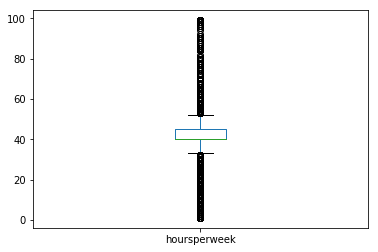

In [36]:
bbox =train_df['hoursperweek'].plot(kind ='box')

In [34]:
bbox

In [37]:
q_df =train_df.quantile([.25, .75])

In [39]:
q_df.loc['diff'] =q_df.loc[0.75]-q_df.loc[0.25]

In [40]:
q_df.loc['whisker'] = 1.5* q_df.loc['diff']

In [45]:
q_df.loc['max_whisker'] = q_df.loc[0.75]+q_df.loc['whisker']

In [46]:
q_df.loc['min_whisker'] = q_df.loc['whisker']-q_df.loc[0.25]

In [47]:
q_df

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
0.25,28.0,117827.0,9.0,0.0,0.0,40.0
0.75,48.0,237051.0,12.0,0.0,0.0,45.0
diff,20.0,119224.0,3.0,0.0,0.0,5.0
whisker,30.0,178836.0,4.5,0.0,0.0,7.5
max_whisker,78.0,415887.0,16.5,0.0,0.0,52.5
min_whisker,2.0,61009.0,-4.5,0.0,0.0,-32.5


# Categorical data

In [48]:
cat_series = pd.Series(['male', 'female', 'male', 'female'])

In [49]:
pd.get_dummies(cat_series)

,female,male
0,0,1
1,1,0
2,0,1
3,1,0


# Visualization

In [50]:
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

boston_data = load_boston()

In [51]:
boston_df = pd.DataFrame(boston_data.data, columns =boston_data.feature_names)

In [53]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


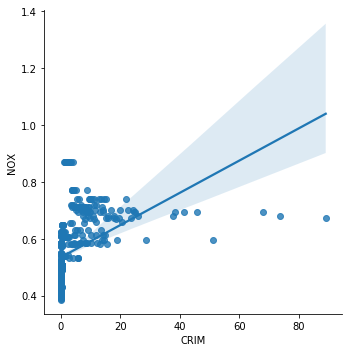

In [54]:
sns.lmplot(x='CRIM', y='NOX', data =boston_df)

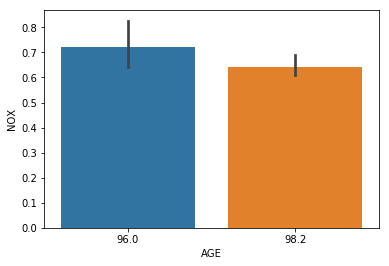

In [58]:
boston_df1 = boston_df[boston_df['AGE'].isin([96, 98.2])]
sns.barplot(boston_df1['AGE'], boston_df1['NOX'])

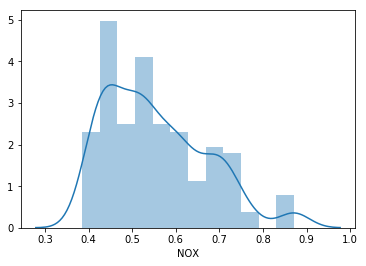

In [60]:
sns.distplot(boston_df.NOX, kde=True)

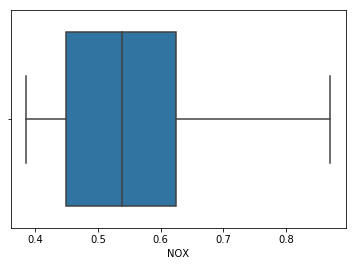

In [61]:
sns.boxplot(boston_df.NOX)

In [62]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


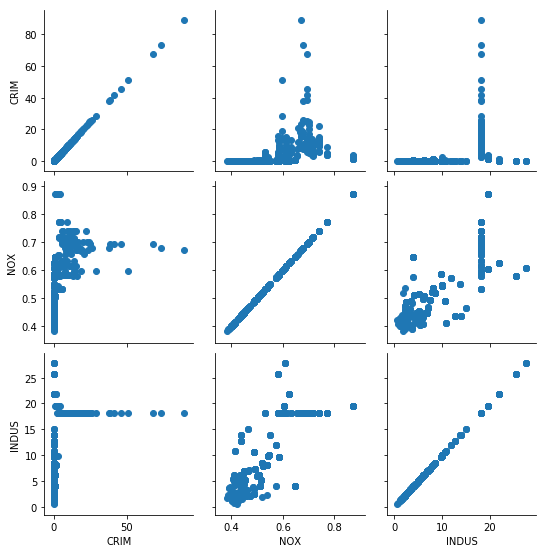

In [63]:
scatter1 = sns.PairGrid(boston_df[['CRIM', 'NOX', 'INDUS']])
scatter1.map(plt.scatter)

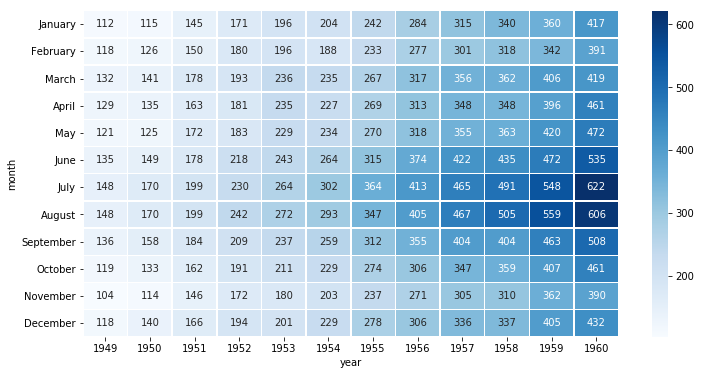

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
flights_long = sns.load_dataset("flights")
# Pivot the dataset from long to wide format
flights = flights_long.pivot("month", "year", "passengers")
# Create a larger figure size to plot on
f, ax = plt.subplots(figsize=(12, 6))
# Create the heat map
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Blues')

In [65]:
#BOKEH - GLYPHS

In [66]:
chat bot - host it on fb or twitter 
parellel processing in python (DASK)

SyntaxError: invalid syntax (<ipython-input-66-4a2abdfbbb56>, line 1)